In [1]:
import time
import numpy as np
import xgboost as xgb
# 绘制特征重要性
from xgboost import plot_importance,plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

# 基于XGBoost原生接口的分类问题

In [2]:
# 加载样本数据集
iris = load_iris()
# 获取数据集的特征值和目标值
X,y = iris.data,iris.target
# 进行训练集和测试集 划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234565) # 数据集分割

In [3]:
# 训练算法参数设置
params = {
    # 通用参数
    'booster': 'gbtree', # 使用的弱学习器,有两种选择gbtree（默认）和gblinear,gbtree是基于
                        # 树模型的提升计算，gblinear是基于线性模型的提升计算
    'nthread': 4, # XGBoost运行时的线程数，缺省时是当前系统获得的最大线程数
    'silent':0, # 0：表示打印运行时信息，1：表示以缄默方式运行，默认为0
    'num_feature':4, # boosting过程中使用的特征维数
    'seed': 1000, # 随机数种子
    # 任务参数
    'objective': 'multi:softmax', # 多分类的softmax,objective用来定义学习任务及相应的损失函数
    'num_class': 3, # 类别总数
    # 提升参数
    'gamma': 0.1, # 叶子节点进行划分时需要损失函数减少的最小值
    'max_depth': 6, # 树的最大深度，缺省值为6，可设置其他值
    'lambda': 2, # 正则化权重
    'subsample': 0.7, # 训练模型的样本占总样本的比例，用于防止过拟合
    'colsample_bytree': 0.7, # 建立树时对特征进行采样的比例
    'min_child_weight': 3, # 叶子节点继续划分的最小的样本权重和
    'eta': 0.1, # 加法模型中使用的收缩步长   
    
}
plst = params.items()

In [4]:
# 数据集格式转换，转换成XGBoost中的数据结构
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test)

In [5]:
# 迭代次数，对于分类问题，每个类别的迭代次数，所以总的基学习器的个数 = 迭代次数*类别个数
num_rounds = 50
model = xgb.train(plst, dtrain, num_rounds) # xgboost模型训练

In [6]:
# 对测试集进行预测
y_pred = model.predict(dtest)

In [7]:
# 计算准确率
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy: %.2f%%" % (accuracy*100.0))

accuarcy: 96.67%


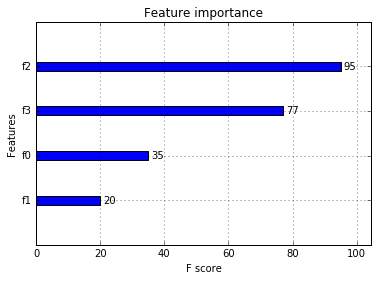

In [8]:
# 显示重要特征
plot_importance(model)
plt.show()

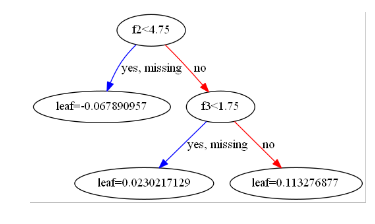

In [9]:
# 可视化树的生成情况，num_trees是树的索引
plot_tree(model, num_trees=5) 

In [10]:
# 将基学习器输出到txt文件中
model.dump_model("model1.txt")

# 基于XGBoost原生接口的回归问题 

In [11]:
# 加载数据集
boston = load_boston()
# 获取特征值和目标指
X,y = boston.data,boston.target
# 获取特征名称
feature_name = boston.feature_names

In [12]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# 参数设置
params = {
        'booster': 'gbtree',
        'objective': 'reg:gamma', # 回归的损失函数，gmma回归
        'gamma': 0.1,
        'max_depth': 5,
        'lambda': 3,
        'subsample': 0.7,
        'colsample_bytree': 0.7,
        'min_child_weight': 3,
        'silent': 1,
        'eta': 0.1,
        'seed': 1000,
        'nthread': 4,
    }
plst = params.items()

In [14]:
# 数据集格式转换
dtrain = xgb.DMatrix(X_train, y_train,feature_names = feature_name)
dtest = xgb.DMatrix(X_test,feature_names = feature_name)

In [15]:
# 模型训练
num_rounds = 30
model = xgb.train(plst, dtrain, num_rounds)

In [16]:
# 模型预测
y_pred = model.predict(dtest)

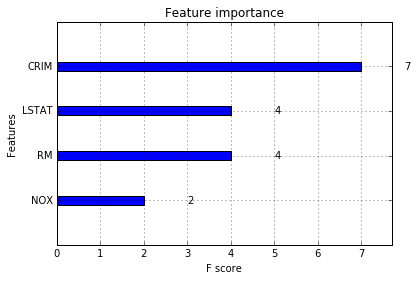

In [17]:
# 显示重要特征
plot_importance(model,importance_type ="weight")
plt.show()

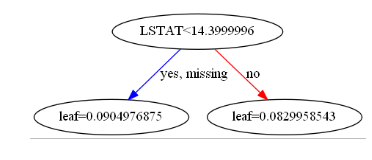

In [18]:
# 可视化树的生成情况，num_trees是树的索引
plot_tree(model, num_trees=17) 

In [19]:
# 将基学习器输出到txt文件中
model.dump_model("model2.txt")

# 基于sklearn的接口实现分类

In [20]:
# 加载样本数据集
iris = load_iris()
X,y = iris.data,iris.target
# 获取特征名称
feature_name = iris.feature_names

In [21]:
# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) 

In [22]:
# 模型训练
model = xgb.XGBClassifier(max_depth=5, n_estimators=50, silent=True, objective='multi:softmax',feature_names=feature_name)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1,
       feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbosity=1)

In [23]:
# 预测
y_pred = model.predict(X_test)

In [24]:
# 计算准确率
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy: %.2f%%" % (accuracy*100.0))

accuarcy: 100.00%


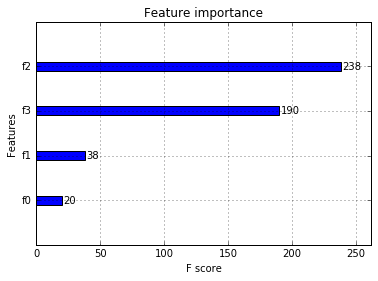

In [25]:
# 显示重要特征
plot_importance(model)

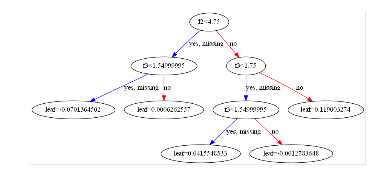

In [26]:
# 可视化树的生成情况，num_trees是树的索引
plot_tree(model, num_trees=5)

# 基于sklearn的接口的回归问题

In [27]:
# 获取数据
boston = load_boston()
X,y = boston.data,boston.target

In [28]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
# 模型训练
model = xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=50, silent=True, objective='reg:gamma')
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:gamma', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbosity=1)

In [30]:
# 预测
y_pred = model.predict(X_test)

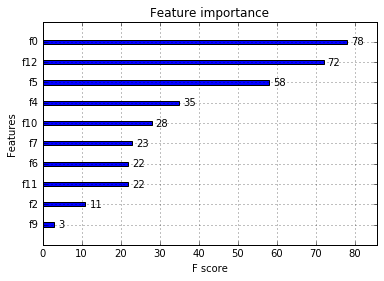

In [31]:
# 显示重要特征
plot_importance(model)
plt.show()

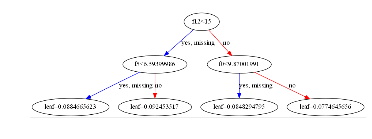

In [32]:
# 可视化树的生成情况，num_trees是树的索引
plot_tree(model, num_trees=17) 